In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
import numpy
import matplotlib.pyplot as plt
import utils.dlc_practical_prologue as prologue

%load_ext autoreload
%autoreload 2

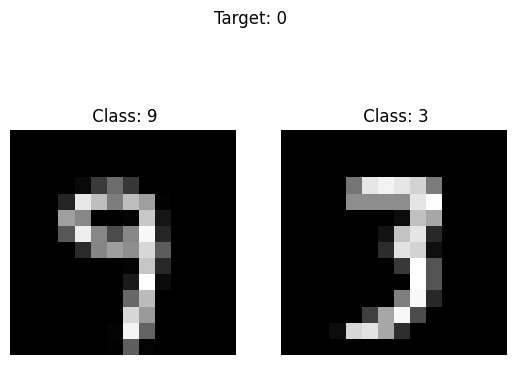

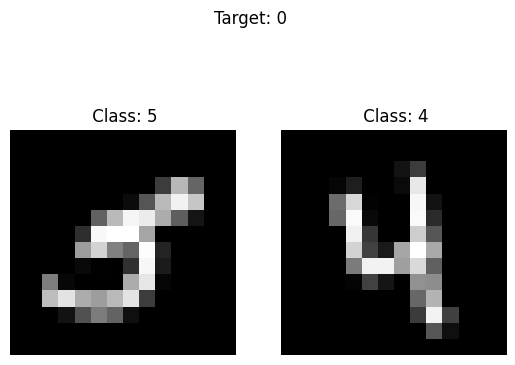

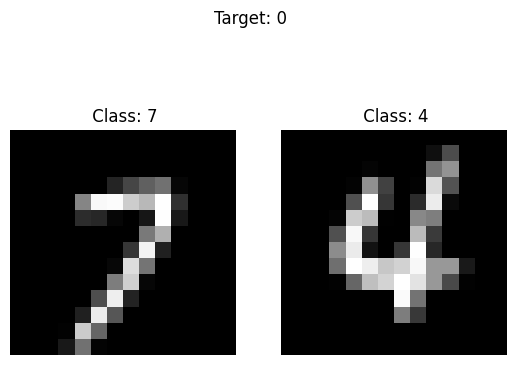

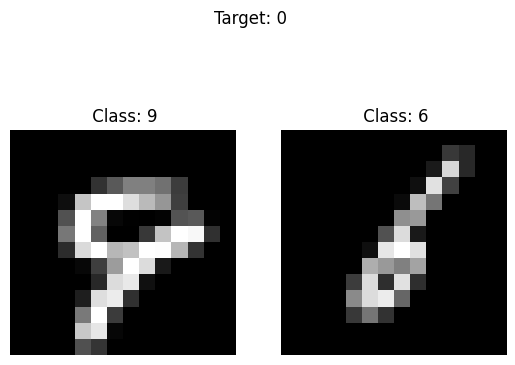

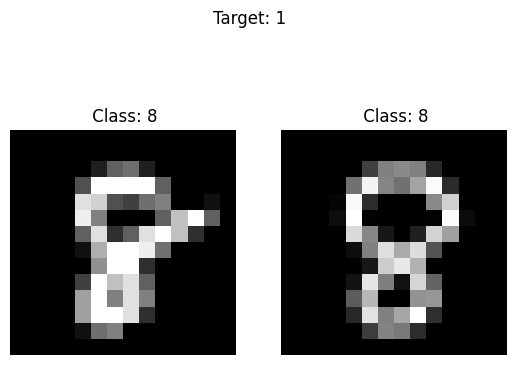

Train input shapetorch.Size([1000, 2, 14, 14])
Train target shapetorch.Size([1000])
Train classes shapetorch.Size([1000, 2])
---
Test input shape torch.Size([1000, 2, 14, 14])
Test target shape torch.Size([1000])
Test classes shape torch.Size([1000, 2])


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),transforms.Normalize(0.5,0.5)])

train_input, train_target, train_classes,\
    test_input, test_target, test_classes = prologue.generate_pair_sets(1000,transform=transform)

# target: 1 if digit 1 <= digit 2, 
#         0 otherwise

# Plotting the first 5 pairs of images
for i in range(5):
    for j in range(2):
        plt.subplot(1, 2, j+1)
        plt.imshow(train_input[i, j].view(14, 14), cmap='gray')
        # plot the target and its class in the title
        plt.suptitle(f"Target: {train_target[i]}")
        plt.title(f' Class: {train_classes[i, j]}')
        plt.axis('off')
    plt.show()

# print the shapes of the tensors
print(f"Train input shape{train_input.shape}")
print(f"Train target shape{train_target.shape}")
print(f"Train classes shape{train_classes.shape}")
print('---')
print(f"Test input shape {test_input.shape}")
print(f"Test target shape {test_target.shape}")
print(f"Test classes shape {test_classes.shape}")


## Examine data format and normalize

In [3]:
print(train_input[0,1].shape)
print(train_input[0,1].dtype)
print(train_input[0,1].max())
print(train_input[0,1].min())

torch.Size([14, 14])
torch.float32
tensor(253.2500)
tensor(0.)


### Baseline

In [62]:
baseline_target_pred = torch.ones_like(train_target)

# compute accuracy of the baseline and the test target
acc = 100 * (baseline_target_pred == test_target).sum().item() / test_target.shape[0]
print(f"Baseline accuracy: {acc:.2f}%")

Baseline accuracy: 54.50%


In [61]:
print(torch.mean(train_target.float()))
print(torch.mean(test_target.float()))

tensor(0.5570)
tensor(0.5450)


### Convnet

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()